# Review Model


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

UsageError: unrecognized arguments: # Plots show up in notebook


In [4]:
df = pd.read_excel(r"C:\Users\Abhilash\Desktop\Data Trained\Flip Robo\Dataset\ratings\Amazon_review_MAster.xlsx")

In [5]:
df.head()

,products,title,rating,body,Reference,Type,Company,asins,Model,Webscraped by,Website,Website link
0,"HP Ink Tank 415 WiFi Colour Printer, High Capa...","Say No To DeskJet, InkJet, InkTank Printers.",2,HP Ink Tank Wireless 415 series.Initially 1 mo...,HP Printer,Printer,HP,B005PB2T01,NaN,Abhilash,Amazon,www.amazon.in
1,"HP Ink Tank 415 WiFi Colour Printer, High Capa...",Good out of box experience,5,Upgraded from my old HP deskjet with HP 415 Al...,HP Printer,Printer,HP,B00OQVZDJM,NaN,Abhilash,Amazon,www.amazon.in
2,"HP Ink Tank 415 WiFi Colour Printer, High Capa...",One of the best printer for office and home use,5,The printer came in a nice packaging the deliv...,HP Printer,Printer,HP,B018Y22BI4,NaN,Abhilash,Amazon,www.amazon.in
3,"HP Ink Tank 415 WiFi Colour Printer, High Capa...",Find an alternative,1,HP has totally lost the plot when it comes to ...,HP Printer,Printer,HP,B00VINDBJK,NaN,Abhilash,Amazon,www.amazon.in
4,"HP Ink Tank 415 WiFi Colour Printer, High Capa...",Not up to the mark,2,Always hangs and scanner never worked since in...,HP Printer,Printer,HP,B018Y23MNM,NaN,Abhilash,Amazon,www.amazon.in


In [6]:
data = df.copy()
data.describe()
#Tried making a copy of the dataset I have optained

,rating
count,2154.000000
mean,3.670845
std,1.658435
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   products       2154 non-null   object
 1   title          2154 non-null   object
 2   rating         2154 non-null   int64 
 3   body           2154 non-null   object
 4   Reference      2154 non-null   object
 5   Type           2154 non-null   object
 6   Company        2154 non-null   object
 7   asins          2154 non-null   object
 8   Model          1554 non-null   object
 9   Webscraped by  2154 non-null   object
 10  Website        2154 non-null   object
 11  Website link   2154 non-null   object
dtypes: int64(1), object(11)
memory usage: 202.1+ KB


In [8]:
data["asins"].unique()
#checking ho my asins have been grouped along

array(['B005PB2T01', 'B00OQVZDJM', 'B018Y22BI4', 'B00VINDBJK',
       'B018Y23MNM', 'B01AHB9CN2', 'B01BFIBRIE', 'B01BFIBRIf',
       'B011BFIBRIf', 'B01BGIBRIE', 'B02BFIBRIE', 'B01VFIBRIE',
       'B01BFISRIE', 'B01BFJBRIE', 'BM1BFIBRIE', 'B11BFIBRIE',
       'B01BFIBsIE'], dtype=object)

In [9]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 17


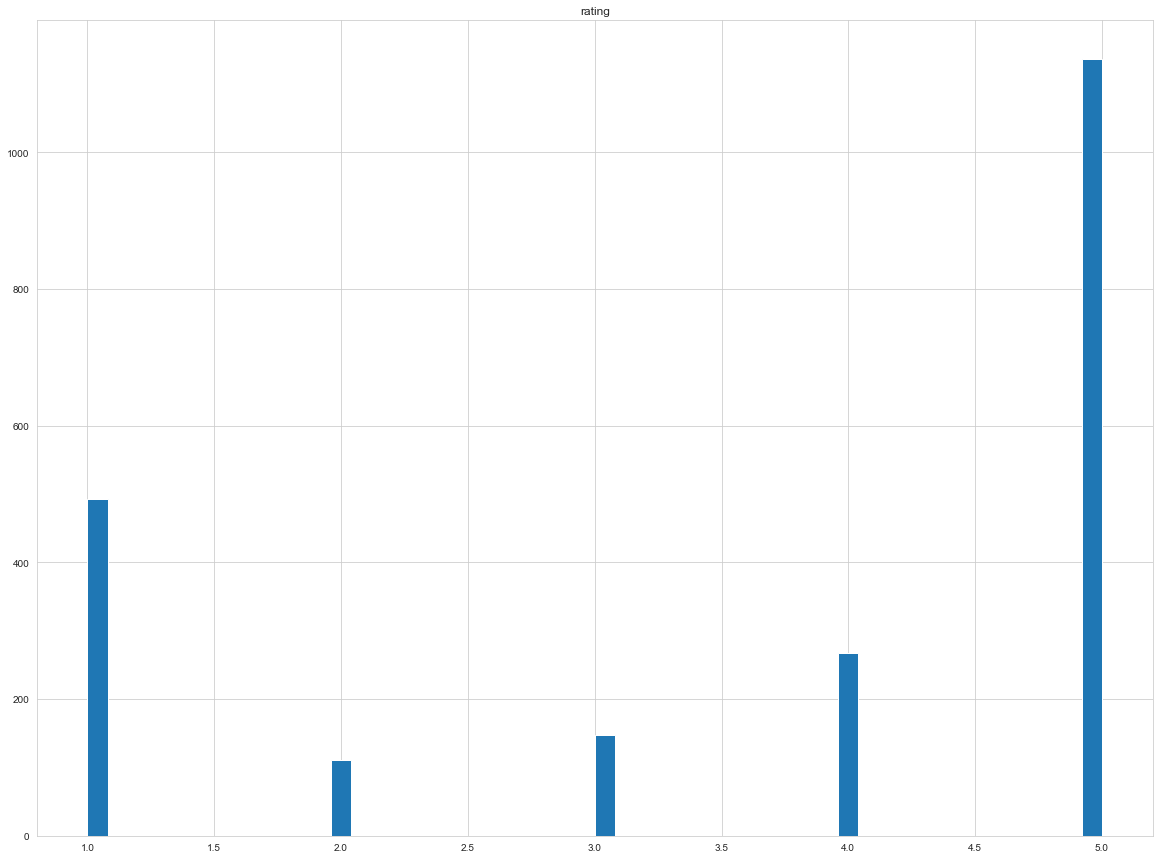

In [10]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()
#Checking how my dataset has been distributed along side of the graph

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["rating"] = dataAfter["rating"].astype(int)

Before 2154
After 2154


In [12]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [13]:
len(strat_train)

1723

In [14]:
strat_train["rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5    0.527568
1    0.228091
4    0.124202
3    0.068485
2    0.051654
Name: rating, dtype: float64

In [15]:
len(strat_test)

431

In [16]:

strat_test["rating"].value_counts()/len(strat_test)

5    0.526682
1    0.229698
4    0.125290
3    0.067285
2    0.051044
Name: rating, dtype: float64

In [17]:
reviews = strat_train.copy()
reviews.head(2)

,products,title,rating,body,Reference,Type,Company,asins,Model,Webscraped by,Website,Website link
223,Apple iPhone 13 Pro Max (256GB) - Graphite,best Mobile camera in market,5,a,iphone 13 pro max,Mobile,Iphone,B01BFIBRIE,13 Pro Max,Abhilash,Amazon,www.amazon.in
1935,LG Ultragear 81.28 cm (32-inch) QHD (2K) Gamin...,Good product and rare according to price and c...,5,"If china is not a problem ,go for it, I bought...",Lg Monitors,Monitor,LG,B01BFISRIE,Ultragear,Abhilash,Amazon,www.amazon.in


In [22]:
len(reviews["products"].unique()), len(reviews["asins"].unique())

(14, 17)

In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723 entries, 223 to 1892
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   products       1723 non-null   object
 1   title          1723 non-null   object
 2   rating         1723 non-null   int32 
 3   body           1723 non-null   object
 4   Reference      1723 non-null   object
 5   Type           1723 non-null   object
 6   Company        1723 non-null   object
 7   asins          1723 non-null   object
 8   Model          1234 non-null   object
 9   Webscraped by  1723 non-null   object
 10  Website        1723 non-null   object
 11  Website link   1723 non-null   object
dtypes: int32(1), object(11)
memory usage: 168.3+ KB


In [24]:
reviews.groupby("asins")["products"].unique()

asins
B005PB2T01     [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B00OQVZDJM     [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B00VINDBJK     [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B011BFIBRIf               [Apple iPhone 13 Pro (128GB) - Silver]
B018Y22BI4     [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B018Y23MNM     [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B01AHB9CN2     [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B01BFIBRIE     [Apple iPhone 13 Pro Max (256GB) - Graphite, S...
B01BFIBRIf     [Apple iPhone 13 Pro (128GB) - Silver, HP Ink ...
B01BFIBsIE     [Zebronics Wired Keyboard and Mouse Combo with...
B01BFISRIE     [LG Ultragear 81.28 cm (32-inch) QHD (2K) Gami...
B01BFJBRIE     [LG Ultragear 81.28 cm (32-inch) QHD (2K) Gami...
B01BGIBRIE                [Apple iPhone 13 Pro (128GB) - Silver]
B01VFIBRIE         [Dyson V10 Absolute Cord-Free Vacuum Cleaner]
B02BFIBRIE     [Fire TV Stick Lite with Alexa Voice Remote Li...
B11BFIBRIE     [Zeb

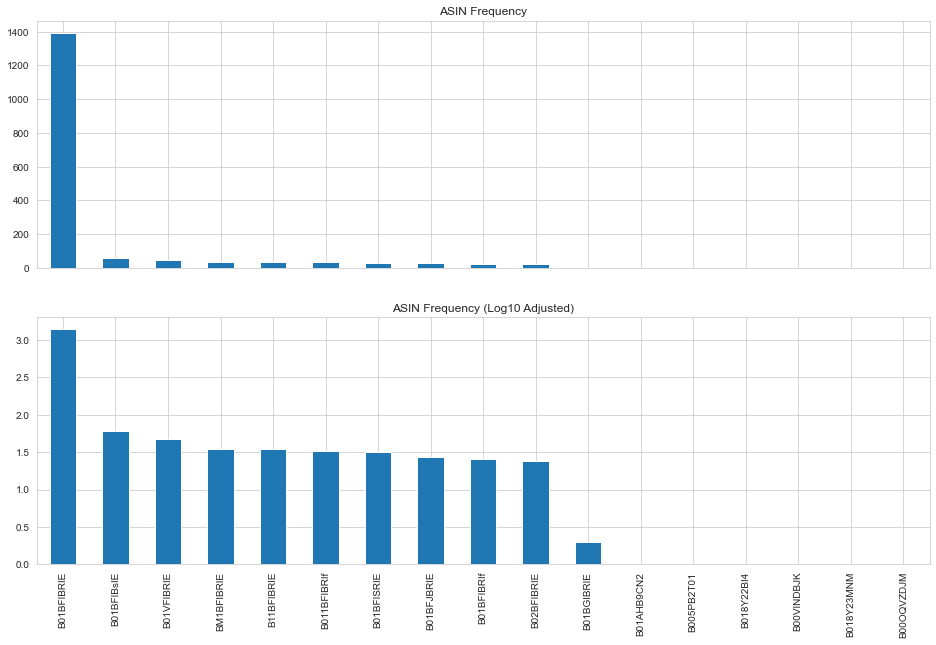

In [25]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [26]:
# Entire training dataset average rating
reviews["rating"].mean()

3.6715031921067904

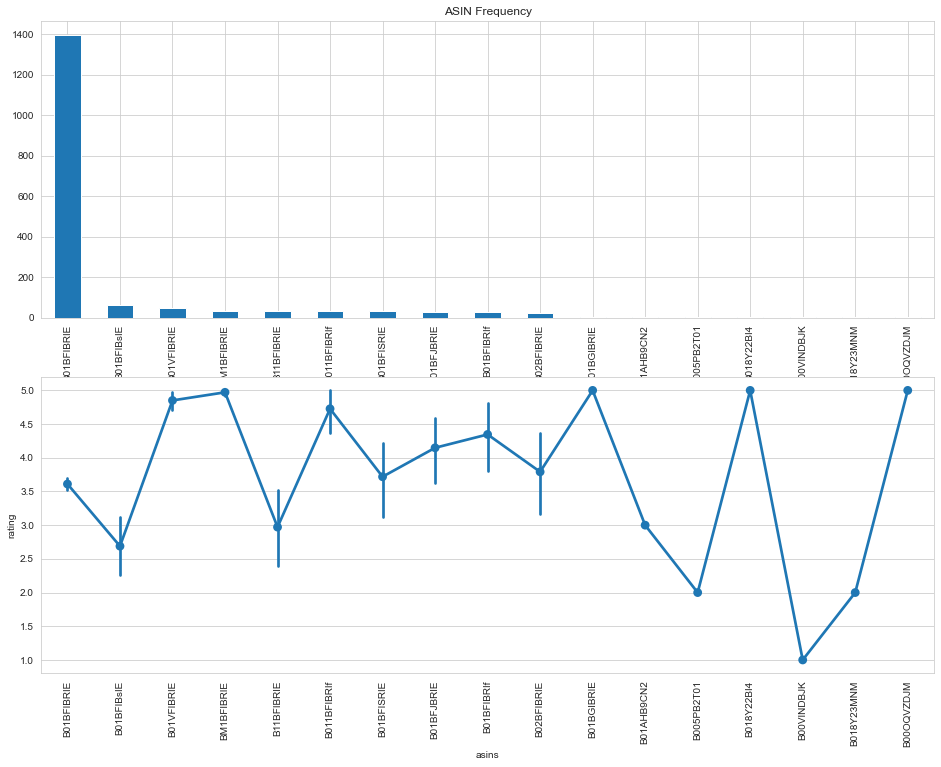

In [27]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [29]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,rating
rating,1.0


In [30]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723 entries, 223 to 1892
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   products       1723 non-null   object
 1   title          1723 non-null   object
 2   rating         1723 non-null   int32 
 3   body           1723 non-null   object
 4   Reference      1723 non-null   object
 5   Type           1723 non-null   object
 6   Company        1723 non-null   object
 7   asins          1723 non-null   object
 8   Model          1234 non-null   object
 9   Webscraped by  1723 non-null   object
 10  Website        1723 non-null   object
 11  Website link   1723 non-null   object
dtypes: int32(1), object(11)
memory usage: 248.3+ KB


In [31]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B01BFIBRIE,1395
B01BFIBsIE,61
B01VFIBRIE,47
BM1BFIBRIE,35
B11BFIBRIE,35


In [32]:
avg_rating = reviews.groupby("asins")["rating"].mean().to_frame()
avg_rating.head()

,rating
asins,
B005PB2T01,2.000000
B00OQVZDJM,5.000000
B00VINDBJK,1.000000
B011BFIBRIf,4.727273
B018Y22BI4,5.000000


In [33]:
table = counts.join(avg_rating)
table.head(30)

,asins,rating
B01BFIBRIE,1395,3.610753
B01BFIBsIE,61,2.688525
B01VFIBRIE,47,4.851064
BM1BFIBRIE,35,4.971429
B11BFIBRIE,35,2.971429
B011BFIBRIf,33,4.727273
B01BFISRIE,32,3.718750
B01BFJBRIE,27,4.148148
B01BFIBRIf,26,4.346154
B02BFIBRIE,24,3.791667


,asins,rating
asins,1.00000,-0.00624
rating,-0.00624,1.00000


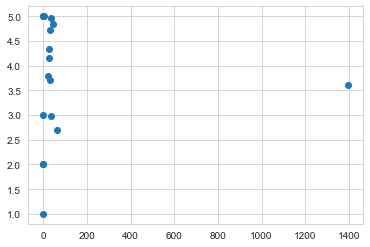

In [34]:
plt.scatter("asins", "rating", data=table)
table.corr()

In [35]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train["Sentiment"][:20]

223     Positive
1935    Positive
912     Positive
1353     Neutral
259     Positive
1755    Positive
1855    Positive
1825    Positive
320     Positive
1867    Positive
1441    Positive
1941    Positive
1477    Negative
1920    Negative
180     Positive
1860    Positive
2011    Positive
1490    Negative
663     Positive
346     Negative
Name: Sentiment, dtype: object

In [38]:
# Prepare data
X_train = strat_train["body"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["body"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

1723 431


In [39]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(1723, 5564)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1723, 5564)

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [42]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.7610208816705336

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.8584686774941995

# SVM

In [44]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.8955916473317865

# Decission Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8306264501160093

# Random Forrest CLassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.8979118329466357